# Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading and Cleaning the Dataset 

- selecting the category 'Child Vaccinations and Vitamin A Supplementation' from the dataset
- Renaming the column names
- creating a indicators series (mapping with shortforms with their full forms)
- storing category title name in a variable
- dropping unnecessary columns from the data frame
- converting the object type data to numerical data type

In [2]:
df_original=pd.read_csv('Food-dataset.csv')

df = df_original.loc[48:59,:]

In [3]:
df=df.rename(columns={"Sl.No":"sno","Indicators (2019-20)": "Indicators", "Total (2019-20)": "2019-20","Total (2015-16)":"2015-16"})
df.head()

,sno,Category,Indicators,Urban,Rural,2019-20,2015-16,Adilabad,Bhadradri,Hyderabad,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
48,49,Child Vaccinations and Vitamin A Supplementation,49. Children age 12-23 months fully vaccinated...,74.7,81.5,79.1,67.5,69.3,80.4,73.8,...,84.1,85.8,78.5,63.1,70.4,86.2,87,79,70.1,76.7
49,50,Child Vaccinations and Vitamin A Supplementation,50. Children age 12-23 months fully vaccinated...,85.7,88.3,87.4,79.1,73.7,87,91.6,...,85.1,91.9,76.3,81.5,79.3,88.7,94.7,83.6,86.8,84.3
50,51,Child Vaccinations and Vitamin A Supplementation,51. Children age 12-23 months who have receive...,90.4,95.3,93.5,97.4,91.6,98,82.1,...,96.4,94.1,95,93,88.2,98.4,97.3,93,89.2,95.2
51,52,Child Vaccinations and Vitamin A Supplementation,52. Children age 12-23 months who have receive...,77,84,81.6,75.2,72.5,86.7,76.3,...,86.1,85.8,81.4,65.1,74.2,87.7,87,79,72.7,80.2
52,53,Child Vaccinations and Vitamin A Supplementation,53. Children age 12-23 months who have receive...,84.3,91.9,89.2,87.9,81.9,93.7,75.4,...,94.4,89.2,90.2,84.2,84.5,90.7,91.9,93,83.3,87.2


In [4]:
indicator_series=df.loc[:,'Indicators'].copy()
k=49
for i in range(48,60):
    df.loc[i,'Indicators'] = 'Indicator-'+str(k)
    k+=1
indicator_series.index=list(df.Indicators)
print(indicator_series)
category=str(df.loc[48,'Category'])
print(category)
df=df.set_index('Indicators')
df_cleaned_original=df.copy()

Indicator-49    49. Children age 12-23 months fully vaccinated...
Indicator-50    50. Children age 12-23 months fully vaccinated...
Indicator-51    51. Children age 12-23 months who have receive...
Indicator-52    52. Children age 12-23 months who have receive...
Indicator-53    53. Children age 12-23 months who have receive...
Indicator-54    54. Children age 12-23 months who have receive...
Indicator-55    55. Children age 24-35 months who have receive...
Indicator-56    56. Children age 12-23 months who have receive...
Indicator-57    57. Children age 12-23 months who have receive...
Indicator-58    58. Children age 9-59 months who received a vi...
Indicator-59    59. Children age 12-23 months who received mos...
Indicator-60    60. Children age 12-23 months who received mos...
Name: Indicators, dtype: object
Child Vaccinations and Vitamin A Supplementation


In [5]:
df=df.drop(columns=['Category','sno'])
df.head()

,Urban,Rural,2019-20,2015-16,Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
Indicators,,,,,,,,,,,,,,,,,,,,,
Indicator-49,74.7,81.5,79.1,67.5,69.3,80.4,73.8,77.7,84.2,87.9,...,84.1,85.8,78.5,63.1,70.4,86.2,87,79,70.1,76.7
Indicator-50,85.7,88.3,87.4,79.1,73.7,87,91.6,94,91.2,97.2,...,85.1,91.9,76.3,81.5,79.3,88.7,94.7,83.6,86.8,84.3
Indicator-51,90.4,95.3,93.5,97.4,91.6,98,82.1,95.7,94.7,96.9,...,96.4,94.1,95,93,88.2,98.4,97.3,93,89.2,95.2
Indicator-52,77,84,81.6,75.2,72.5,86.7,76.3,77.7,84.2,87.9,...,86.1,85.8,81.4,65.1,74.2,87.7,87,79,72.7,80.2
Indicator-53,84.3,91.9,89.2,87.9,81.9,93.7,75.4,93.2,94.7,94,...,94.4,89.2,90.2,84.2,84.5,90.7,91.9,93,83.3,87.2


In [6]:
df.isnull().sum()

Urban                       0
Rural                       0
2019-20                     0
2015-16                     0
Adilabad                    0
Bhadradri                   0
Hyderabad                   0
Jagitial                    0
Jangoan                     0
Jayashankar Bhupalapally    0
Jogulamba Gadwal            0
Kamareddy                   0
Karimnagar                  0
Khammam                     0
KumurumBheem                0
Mahabubabad                 0
Mahabubnagar                0
Mancherial                  0
Medak                       0
Medchal-Malkajgiri          0
Nagarkurnool                0
Nalgonda                    0
Nirmal                      0
Nizamabad                   0
Peddapalli                  0
Rajanna Sircilla            0
Ranga Reddy                 0
Sangareddy                  0
Siddipet                    0
Suryapet                    0
Vikarabad                   0
Wanaparthy,                 0
Warangal Rural              0
Warangal U

In [7]:
df.shape

(12, 35)

In [8]:
df.describe()

,Urban,Rural,2019-20,2015-16,Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
count,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
unique,12,12,12,12,11,11,12,10,8,10,...,12,11,12,12,12,11,9,7,12,12
top,3.9,6.1,36.4,97.4,81.9,93.7,91.6,77.7,94.7,87.9,...,73.3,85.8,26.5,84.2,92.1,98.4,87,93,8.6,37.9
freq,1,1,1,1,2,2,1,2,3,2,...,1,2,1,1,1,2,2,4,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Indicator-49 to Indicator-60
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Urban                     12 non-null     object
 1   Rural                     12 non-null     object
 2   2019-20                   12 non-null     object
 3   2015-16                   12 non-null     object
 4   Adilabad                  12 non-null     object
 5   Bhadradri                 12 non-null     object
 6   Hyderabad                 12 non-null     object
 7   Jagitial                  12 non-null     object
 8   Jangoan                   12 non-null     object
 9   Jayashankar Bhupalapally  12 non-null     object
 10  Jogulamba Gadwal          12 non-null     object
 11  Kamareddy                 12 non-null     object
 12  Karimnagar                12 non-null     object
 13  Khammam                   12 non-null     object
 14  KumurumBheem

In [10]:
for col in list(df.columns):
    df[col] = pd.to_numeric(df[col],errors='ignore')
df.dtypes

Urban                       float64
Rural                       float64
2019-20                     float64
2015-16                     float64
Adilabad                    float64
Bhadradri                   float64
Hyderabad                   float64
Jagitial                    float64
Jangoan                     float64
Jayashankar Bhupalapally    float64
Jogulamba Gadwal            float64
Kamareddy                   float64
Karimnagar                  float64
Khammam                     float64
KumurumBheem                float64
Mahabubabad                 float64
Mahabubnagar                float64
Mancherial                  float64
Medak                       float64
Medchal-Malkajgiri          float64
Nagarkurnool                float64
Nalgonda                    float64
Nirmal                      float64
Nizamabad                   float64
Peddapalli                  float64
Rajanna Sircilla            float64
Ranga Reddy                 float64
Sangareddy                  

In [11]:
df.describe()

,Urban,Rural,2019-20,2015-16,Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,64.858333,70.333333,68.375000,65.873387,66.166667,71.516667,60.091667,70.166667,71.208333,73.150000,...,70.875000,68.375000,67.333333,65.858333,63.191667,69.825000,70.325000,69.716667,67.408333,67.766667
std,31.810274,34.360927,33.431779,29.301797,31.062703,34.844742,31.782570,33.356513,36.584683,35.421552,...,35.373234,34.970146,32.956509,30.617656,32.548103,36.086767,37.794591,36.045649,30.949297,33.539701
min,3.900000,2.400000,4.500000,5.945160,4.700000,1.800000,2.500000,6.200000,0.000000,2.600000,...,1.500000,0.000000,2.000000,4.700000,0.000000,1.600000,0.000000,0.000000,1.600000,3.000000
25%,58.875000,66.200000,63.400000,60.883871,62.900000,65.250000,51.450000,63.925000,70.750000,64.275000,...,65.450000,58.475000,62.125000,57.325000,59.050000,58.050000,61.150000,69.075000,66.300000,61.675000
50%,78.500000,86.150000,84.000000,75.600000,77.800000,86.850000,74.600000,84.250000,86.800000,90.950000,...,85.600000,86.700000,79.500000,80.700000,76.750000,88.200000,87.000000,83.650000,79.250000,82.250000
75%,85.950000,92.100000,89.550000,84.675000,85.950000,94.300000,78.950000,93.350000,94.700000,96.900000,...,94.500000,89.875000,89.825000,85.300000,84.725000,91.425000,95.350000,93.000000,87.400000,87.900000
max,90.400000,96.900000,94.100000,97.400000,94.900000,98.200000,91.600000,95.700000,100.000000,97.400000,...,96.800000,94.100000,98.100000,95.300000,92.100000,98.400000,100.000000,100.000000,91.800000,97.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Indicator-49 to Indicator-60
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Urban                     12 non-null     float64
 1   Rural                     12 non-null     float64
 2   2019-20                   12 non-null     float64
 3   2015-16                   12 non-null     float64
 4   Adilabad                  12 non-null     float64
 5   Bhadradri                 12 non-null     float64
 6   Hyderabad                 12 non-null     float64
 7   Jagitial                  12 non-null     float64
 8   Jangoan                   12 non-null     float64
 9   Jayashankar Bhupalapally  12 non-null     float64
 10  Jogulamba Gadwal          12 non-null     float64
 11  Kamareddy                 12 non-null     float64
 12  Karimnagar                12 non-null     float64
 13  Khammam                   12 non-null     float64
 

In [13]:
df

,Urban,Rural,2019-20,2015-16,Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
Indicators,,,,,,,,,,,,,,,,,,,,,
Indicator-49,74.7,81.5,79.1,67.500000,69.3,80.4,73.8,77.7,84.2,87.9,...,84.1,85.8,78.5,63.1,70.4,86.2,87.0,79.0,70.1,76.7
Indicator-50,85.7,88.3,87.4,79.100000,73.7,87.0,91.6,94.0,91.2,97.2,...,85.1,91.9,76.3,81.5,79.3,88.7,94.7,83.6,86.8,84.3
Indicator-51,90.4,95.3,93.5,97.400000,91.6,98.0,82.1,95.7,94.7,96.9,...,96.4,94.1,95.0,93.0,88.2,98.4,97.3,93.0,89.2,95.2
Indicator-52,77.0,84.0,81.6,75.200000,72.5,86.7,76.3,77.7,84.2,87.9,...,86.1,85.8,81.4,65.1,74.2,87.7,87.0,79.0,72.7,80.2
Indicator-53,84.3,91.9,89.2,87.900000,81.9,93.7,75.4,93.2,94.7,94.0,...,94.4,89.2,90.2,84.2,84.5,90.7,91.9,93.0,83.3,87.2
Indicator-54,86.7,92.7,90.6,90.100000,86.7,96.1,77.9,93.2,94.7,96.9,...,94.8,87.6,89.7,88.6,85.4,93.6,97.3,93.0,91.8,90.0
Indicator-55,29.7,40.1,36.4,41.035483,43.7,41.4,19.8,38.2,40.6,45.6,...,41.9,30.5,26.5,40.0,25.6,33.9,30.4,39.3,54.9,37.9
Indicator-56,3.9,6.1,5.3,5.945160,7.4,8.0,2.5,9.0,0.0,6.5,...,1.5,0.0,15.8,13.4,0.0,3.4,0.0,0.0,1.6,5.1
Indicator-57,80.0,89.9,86.4,70.500000,81.9,93.7,70.1,90.8,89.4,94.4,...,92.8,87.8,80.5,81.2,80.5,89.2,86.9,93.0,80.0,87.0


In [14]:
df.describe()

,Urban,Rural,2019-20,2015-16,Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,64.858333,70.333333,68.375000,65.873387,66.166667,71.516667,60.091667,70.166667,71.208333,73.150000,...,70.875000,68.375000,67.333333,65.858333,63.191667,69.825000,70.325000,69.716667,67.408333,67.766667
std,31.810274,34.360927,33.431779,29.301797,31.062703,34.844742,31.782570,33.356513,36.584683,35.421552,...,35.373234,34.970146,32.956509,30.617656,32.548103,36.086767,37.794591,36.045649,30.949297,33.539701
min,3.900000,2.400000,4.500000,5.945160,4.700000,1.800000,2.500000,6.200000,0.000000,2.600000,...,1.500000,0.000000,2.000000,4.700000,0.000000,1.600000,0.000000,0.000000,1.600000,3.000000
25%,58.875000,66.200000,63.400000,60.883871,62.900000,65.250000,51.450000,63.925000,70.750000,64.275000,...,65.450000,58.475000,62.125000,57.325000,59.050000,58.050000,61.150000,69.075000,66.300000,61.675000
50%,78.500000,86.150000,84.000000,75.600000,77.800000,86.850000,74.600000,84.250000,86.800000,90.950000,...,85.600000,86.700000,79.500000,80.700000,76.750000,88.200000,87.000000,83.650000,79.250000,82.250000
75%,85.950000,92.100000,89.550000,84.675000,85.950000,94.300000,78.950000,93.350000,94.700000,96.900000,...,94.500000,89.875000,89.825000,85.300000,84.725000,91.425000,95.350000,93.000000,87.400000,87.900000
max,90.400000,96.900000,94.100000,97.400000,94.900000,98.200000,91.600000,95.700000,100.000000,97.400000,...,96.800000,94.100000,98.100000,95.300000,92.100000,98.400000,100.000000,100.000000,91.800000,97.000000


In [15]:
df.head()

,Urban,Rural,2019-20,2015-16,Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
Indicators,,,,,,,,,,,,,,,,,,,,,
Indicator-49,74.7,81.5,79.1,67.5,69.3,80.4,73.8,77.7,84.2,87.9,...,84.1,85.8,78.5,63.1,70.4,86.2,87.0,79.0,70.1,76.7
Indicator-50,85.7,88.3,87.4,79.1,73.7,87.0,91.6,94.0,91.2,97.2,...,85.1,91.9,76.3,81.5,79.3,88.7,94.7,83.6,86.8,84.3
Indicator-51,90.4,95.3,93.5,97.4,91.6,98.0,82.1,95.7,94.7,96.9,...,96.4,94.1,95.0,93.0,88.2,98.4,97.3,93.0,89.2,95.2
Indicator-52,77.0,84.0,81.6,75.2,72.5,86.7,76.3,77.7,84.2,87.9,...,86.1,85.8,81.4,65.1,74.2,87.7,87.0,79.0,72.7,80.2
Indicator-53,84.3,91.9,89.2,87.9,81.9,93.7,75.4,93.2,94.7,94.0,...,94.4,89.2,90.2,84.2,84.5,90.7,91.9,93.0,83.3,87.2


# Data Visualization

- holding all Numerical, Categorical data in seperate variable
- plotting Bar plot, Relation plot, Pairplot, Scatterplots, Heatmap, Regression plot,...

In [16]:
numerical_data=df.select_dtypes(include=[np.number])
categorical_data=df.select_dtypes(include=[np.object])
districts_df = df.loc[:,'Adilabad':].copy()

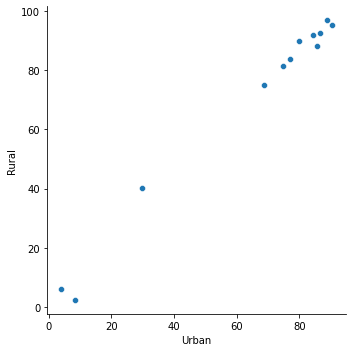

In [17]:
sns.relplot(data=df,x='Urban',y='Rural')

<Figure size 1080x1080 with 0 Axes>

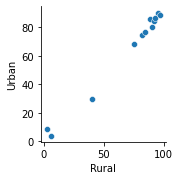

In [18]:
plt.figure(figsize=(15,15))
sns.pairplot(df,x_vars=['Rural'],y_vars=['Urban'])

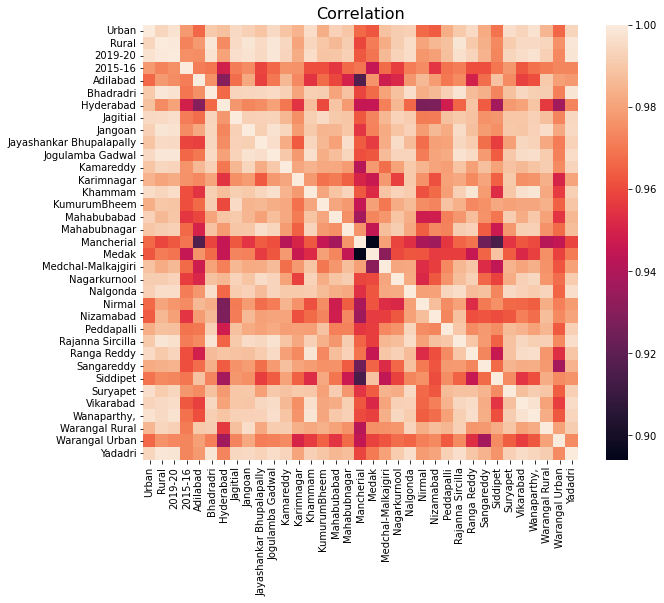

In [19]:
f,ax=plt.subplots(figsize=(10,8))
plt.title('Correlation',size=16)
sns.heatmap(data=numerical_data.corr(),square=True)
plt.show()

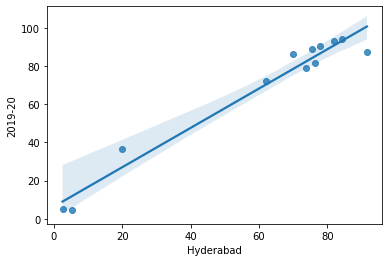

In [20]:
sns.regplot(x='Hyderabad',y='2019-20',data=numerical_data,fit_reg=True,scatter=True)
plt.show()

In [21]:
districts = list(numerical_data.loc[:,'Adilabad':].columns)
t=districts
t.append('Urban')
t.append('Rural')

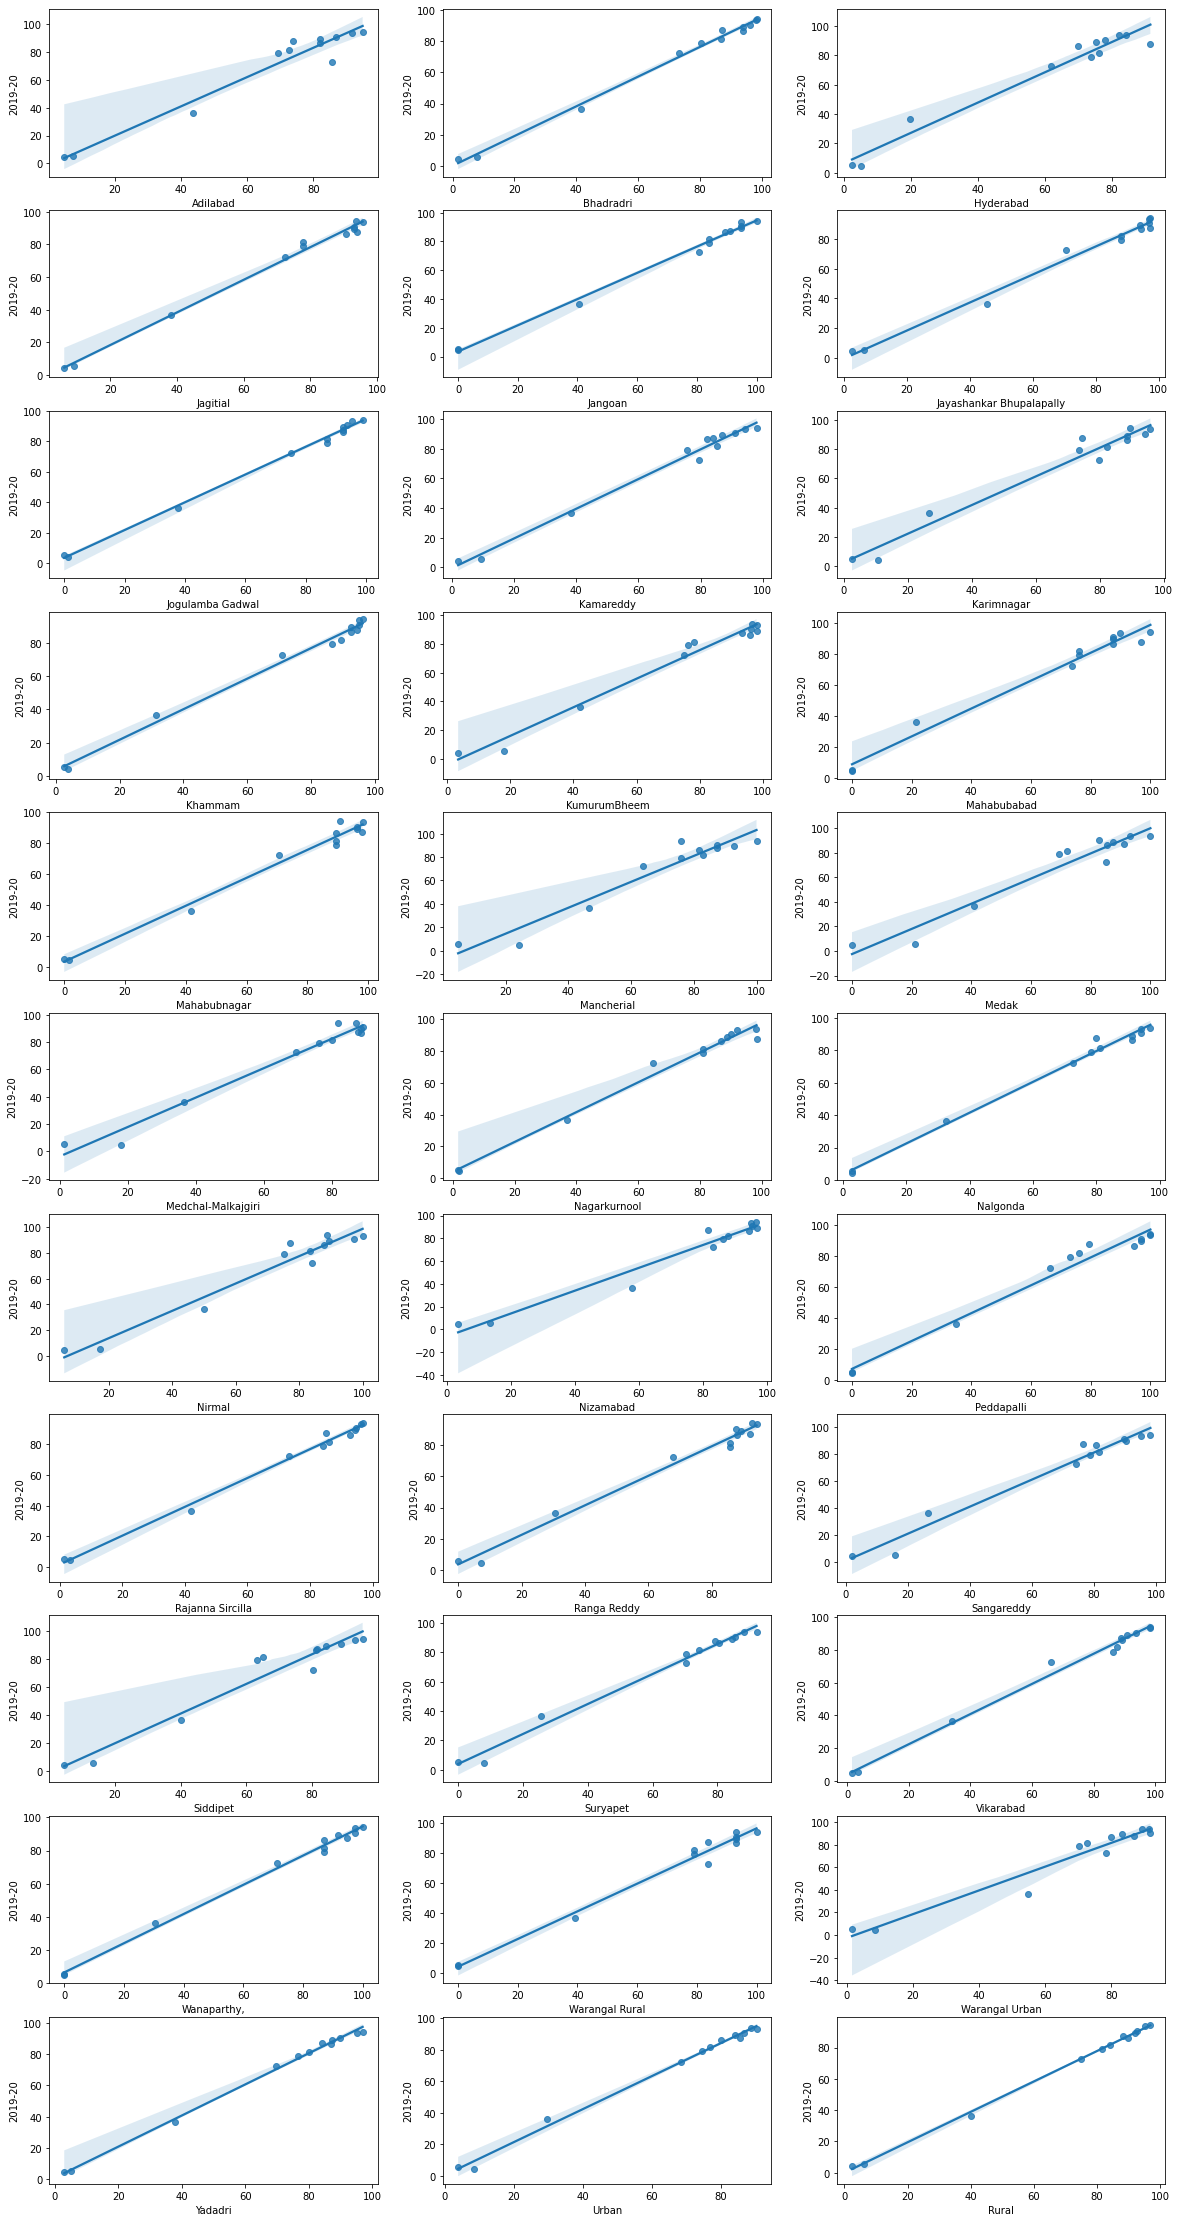

In [22]:
plt.figure(figsize=(20,40))
for col in list(enumerate(t)):
    plt.subplot(11,3,col[0]+1)
    sns.regplot(x=col[1],y='2019-20',data=numerical_data,fit_reg=True,scatter=True)

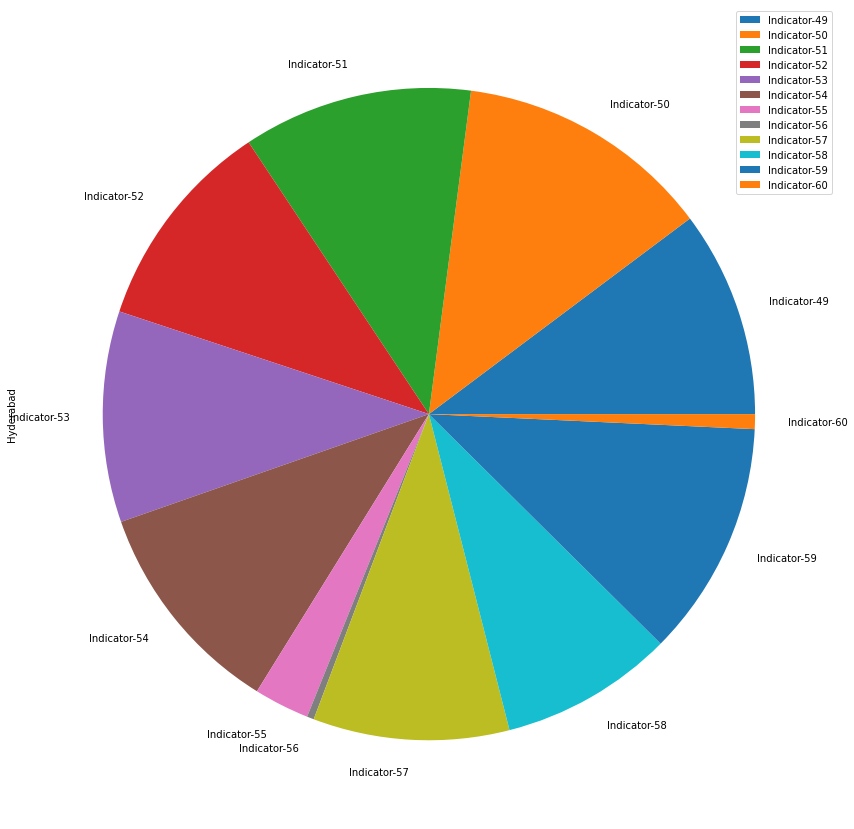

In [23]:
numerical_data.plot.pie(x='Rural',y='Hyderabad',figsize=(15, 15))
plt.show()

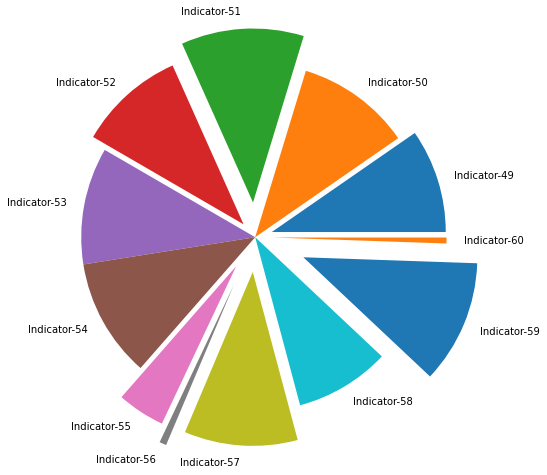

In [24]:
plt.figure(figsize =(8, 8))
explode = (0.1, 0.0, 0.2, 0.1, 0.0,0.0,0.2,0.3,0.2,0.0,0.3,0.1)
plt.pie(df.loc[:,'2019-20'],labels=df.index,explode=explode)
plt.show()


In [25]:
df_t = numerical_data.T

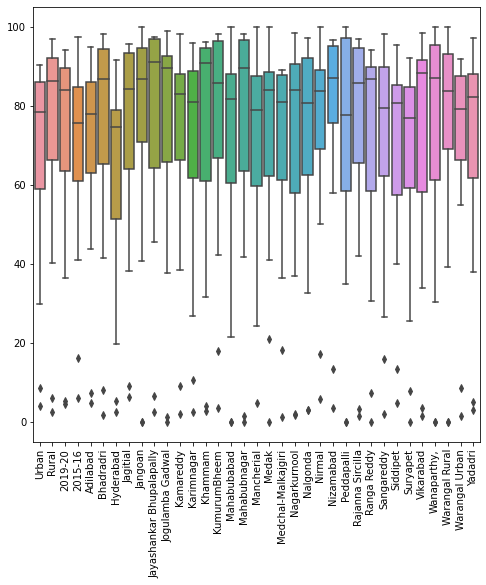

In [26]:
plt.subplots(figsize=(8,8))
sns.boxplot(data=df).set_xticklabels(labels=df_t.index,rotation=90)
plt.show()

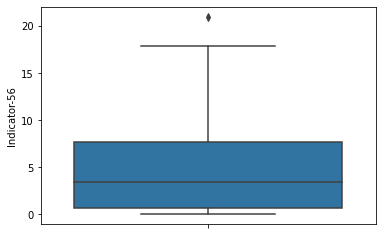

In [27]:
sns.boxplot(y='Indicator-56',data=df_t)

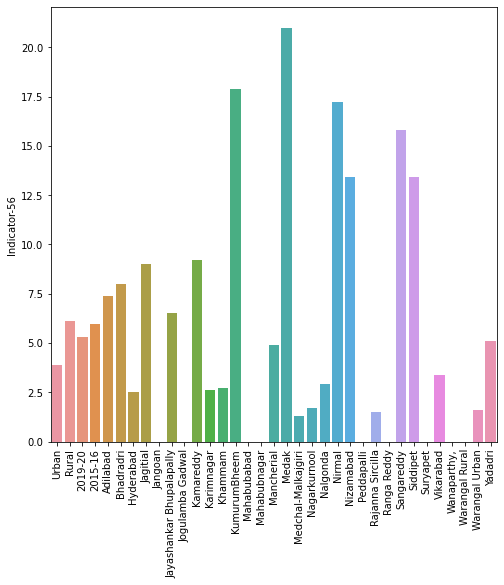

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(y='Indicator-56',x=df_t.index,data=df_t).set_xticklabels(labels=df_t.index,rotation=90)
plt.show()

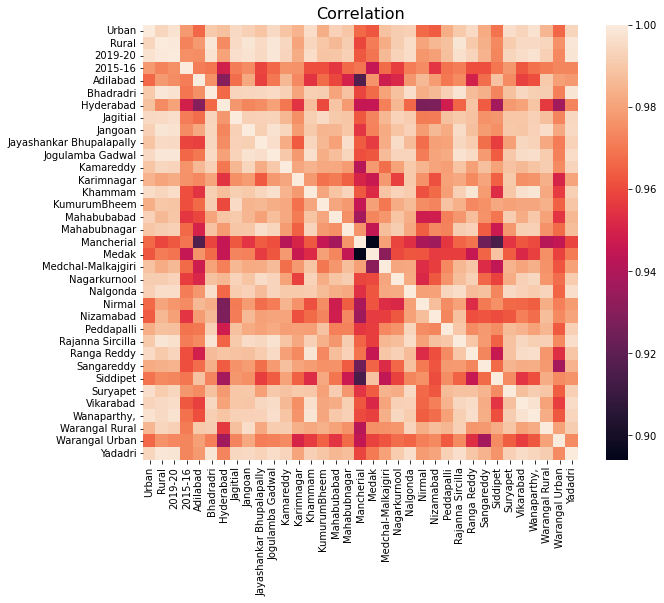

In [29]:
plt.figure(figsize=(10,8))
plt.title('Correlation',size=16)
sns.heatmap(data=numerical_data.corr(),square=True)
plt.show()

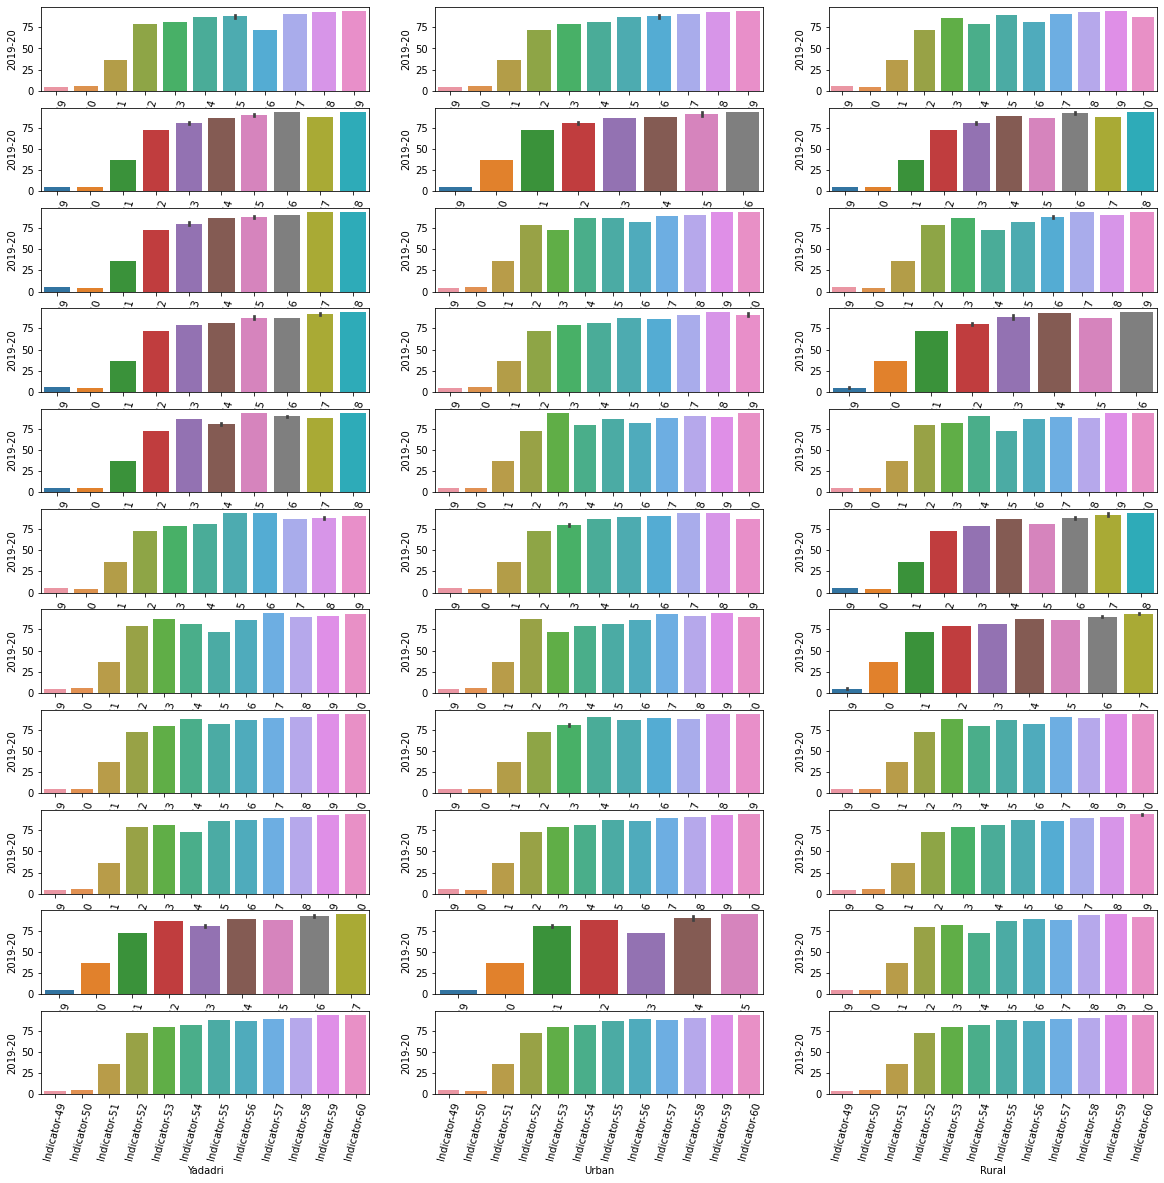

In [30]:
plt.subplots(figsize=(20,20))
for col in list(enumerate(t)):
    plt.subplot(11,3,col[0]+1)
    sns.barplot(x=col[1],y=df.loc[:,'2019-20'],data=df).set_xticklabels(labels=df.index,rotation=75)
    

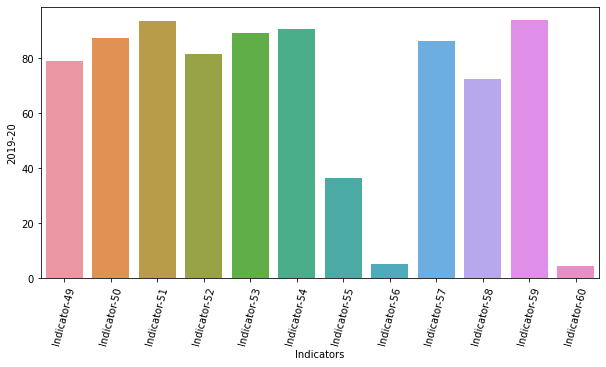

In [31]:
plt.subplots(figsize=(10,5))
sns.barplot(x=df.index,y=df.loc[:,'2019-20'],data=df).set_xticklabels(labels=df.index,rotation=75)
plt.show()